#大問1

In [1]:
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [2]:
# 変数定義
c, l, w = symbols('c l w')
c1, c2, l1, l2, w1, w2, a, t = symbols('c1 c2 l1 l2 w1 w2 a t')

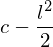

In [3]:
# 効用関数をつくる
Utility = c - l**2/2
Utility

In [4]:
# 代入する
Utility = Utility.subs({c:(1-t)*w*l + a})
# 一階条件
ans_l = solve(diff(Utility, l), l)

In [5]:
# 最適労働量
print ans_l

[w*(-t + 1)]


In [6]:
# 消費関数に代入
consume = (1-t)*w*l + a
ans_c = consume.subs({l:w(-t+1)})

In [7]:
# 最適消費量
print ans_c

a + w*(-t + 1)*w(-t + 1)


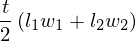

In [8]:
# 政府制約
A = (w1*l1 + w2*l2)*t/2
A

In [9]:
ans_a = A.subs({l1:(-t+1), l2:2*(-t+1)})

In [10]:
ans_a = ans_a.subs({w1:1, w2:2})

In [11]:
# 補助金額
print ans_a

t*(-5*t + 5)/2


In [12]:
Utility = Utility.subs({c:a + w*(-t + 1)*w(-t + 1), l:w*(-t + 1)})

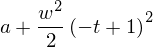

In [13]:
Utility

In [14]:
Utility = Utility.subs({a:t*(-5*t + 5)/2})

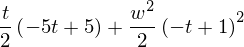

In [15]:
Utility

In [16]:
U1 = Utility.subs({w:1})
U2 = Utility.subs({w:2})

In [17]:
print U1

t*(-5*t + 5)/2 + (-t + 1)**2/2


In [18]:
print U2

t*(-5*t + 5)/2 + 2*(-t + 1)**2


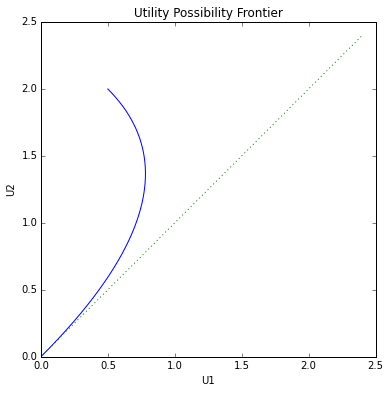

In [19]:
_x = np.arange(0.0,1.0,0.001)
_y = np.arange(0.0,2.5,0.1)
def U1_func(t):
    return t*(-5*t + 5)/2 + (-t + 1)**2/2
def U2_func(t):
    return t*(-5*t + 5)/2 + 2*(-t + 1)**2
plt.figure(figsize=(6, 6))
plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.xlabel("U1")
plt.ylabel("U2")
plt.plot(U1_func(_x), U2_func(_x), label="sample")
plt.plot(_y, _y, ':')
plt.title("Utility Possibility Frontier")
plt.savefig('UtilityPossibilityFrontier.png', dpi=150)
plt.show()

In [20]:
plt.clf()

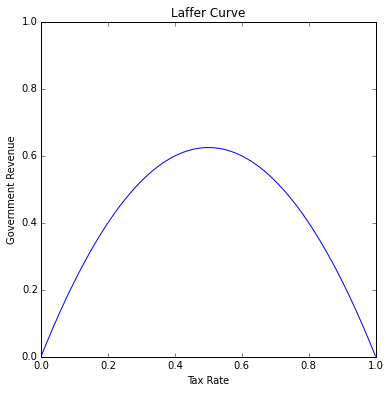

In [21]:
_x = np.arange(0.0,1.0,0.001)
def a_func(t):
    return t*(-5*t + 5)/2
plt.figure(figsize=(6, 6))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Tax Rate")
plt.ylabel("Government Revenue")
plt.plot(_x, a_func(_x), label="sample")
plt.title("Laffer Curve")
plt.savefig('LafferCurve.png', dpi=150)
plt.show()

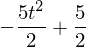

In [22]:
Bentham = U1 + U2
expand(Bentham)

In [23]:
diff(Bentham, t)

In [24]:
solve(diff(Bentham, t), t)

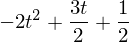

In [25]:
Rawls = U1
expand(Rawls)

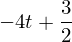

In [26]:
diff(Rawls, t)

In [27]:
solve(diff(Rawls, t), t)

#大問2

In [28]:
incomes = [50, 50, 200, 300, 400]

In [29]:
g = 0
for i in incomes:
    for k in incomes:
        g += abs(i-k)
g /= float((2*len(incomes)*sum(incomes)))
print "ジニ係数は%s" % g

ジニ係数は0.38


In [30]:
fgt = 0
for i in incomes:
    if i <= 100:
        fgt += (100-i)/100.0 * 0.2
print "貧困ギャップ率は%s" % fgt

貧困ギャップ率は0.2


In [31]:
for shiguma in [0.0, 2.0]:
    ye = 0
    y = 0
    for i in incomes:
        y += i**(1- shiguma)
    ye = (y/len(incomes))**(1-shiguma)
    print "格差回避度%sのときのアトキンソン指数は、" % shiguma
    print 1-(ye/200)

格差回避度0.0のときのアトキンソン指数は、
0.0
格差回避度2.0のときのアトキンソン指数は、
0.508196721311


In [32]:
import math
for shiguma in [1.0]:
    ye = 0
    y = 0
    for i in incomes:
        y += math.log(i)
    ye = math.exp(y/len(incomes))
    print "格差回避度%sのときのアトキンソン指数は、" % shiguma
    print 1-(ye/200)

格差回避度1.0のときのアトキンソン指数は、
0.284515459447
